In [1]:
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = h5py.File('antmaze_umaze_fixstart_fixgoal.hdf5', 'r')
list(f.keys())

['actions', 'infos', 'observations', 'rewards', 'terminals', 'timeouts']

In [3]:
data = dict(
    act = np.asarray(f['actions']),
    obs = np.asarray(f['observations']),
    done = np.asarray(f['terminals']),
    timeout = np.asarray(f['timeouts']),
)

In [4]:
for k, v in data.items():
    print(k, v.shape)

act (17958, 8)
obs (17958, 29)
done (17958,)
timeout (17958,)


In [5]:
act_df = pd.DataFrame(data=data['act'])
obs_df = pd.DataFrame(data=data['obs'])
done_df = pd.DataFrame(data=data['done'])
timeout_df = pd.DataFrame(data=data['timeout'])

In [6]:
obs_df.iloc[:, [0,1,2]].head(5)

,0,1,2
0,0.000000,0.000000,0.750000
1,-0.017929,0.000284,0.735723
2,-0.053475,0.002530,0.613888
3,-0.082146,-0.021050,0.488201
4,0.014127,-0.050072,0.551865


In [7]:
def visualize_path(data=None, goal=[0, 8]):
    """ """
    fig = plt.figure()
    offset = -2
    size = 0.25 + 2 * 0.08
    scaling = 4
    # path
    if data is not None:
        plt.plot(data[:, 0], data[:, 1], "o-")
        plt.plot(
            data[0, 0],
            data[0, 1],
            "go",
            markersize=10,
            markeredgecolor="k",
            label="start",
        )
        plt.plot(
            data[-1, 0],
            data[-1, 1],
            "ro",
            markersize=10,
            markeredgecolor="k",
            label="achieved goal",
        )
        # achived goal with radius
        achieved_circle = plt.Circle(
            xy=(data[-1, 0], data[-1, 1]),
            radius=0.1,
            color="r",
            lw=1,
            label="achieved region",
        )
        plt.gca().add_patch(achieved_circle)

    # goal pos
    plt.plot(
        goal[0], goal[1], "bo", markersize=10, markeredgecolor="k", label="desired goal"
    )
    # goal region
    goal_region = plt.Circle(
        xy=(goal[0], goal[1]),
        radius=0.5,
        alpha=0.5,
        color="darkorange",
        lw=1,
        label="goal region",
    )
    plt.gca().add_patch(goal_region)

    # UMaze boundary
    UMaze_x = np.array([0, 3, 3, 0, 0, 2, 2, 0, 0]) * scaling + offset
    UMaze_y = np.array([0, 0, 3, 3, 2, 2, 1, 1, 0]) * scaling + offset
    plt.plot(UMaze_x, UMaze_y, "r")

    # feasible region
    UMaze_feasible_x = UMaze_x + size * np.array([1, -1, -1, 1, 1, 1, 1, 1, 1])
    UMaze_feasible_y = UMaze_y + size * np.array([1, 1, -1, -1, 1, 1, -1, -1, 1])
    plt.plot(UMaze_feasible_x, UMaze_feasible_y, "k--")

    plt.legend()
    plt.grid()

In [8]:
lst = []
i = 0

while i < data['obs'].shape[0]:
    if data['done'][i]:
        lst.append(i)
    i += 1
print(lst)
assert len(lst) == 100 

[263, 507, 795, 996, 1162, 1326, 1620, 1814, 1974, 2119, 2242, 2433, 2600, 2764, 3032, 3158, 3342, 3508, 3643, 3822, 3980, 4129, 4254, 4398, 4545, 4705, 4910, 5140, 5302, 5483, 5701, 5908, 6058, 6235, 6440, 6583, 6748, 6897, 7032, 7189, 7355, 7504, 7674, 7894, 8070, 8229, 8439, 8614, 8793, 8960, 9183, 9359, 9559, 9710, 9863, 10053, 10201, 10345, 10479, 10656, 10891, 11059, 11201, 11370, 11527, 11784, 11948, 12129, 12367, 12502, 12644, 12883, 13040, 13227, 13401, 13529, 13733, 13952, 14080, 14273, 14450, 14613, 14767, 14922, 15071, 15222, 15372, 15509, 15680, 15857, 16039, 16271, 16432, 16619, 16761, 16988, 17232, 17461, 17664, 17957]


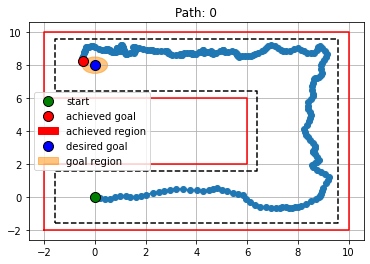

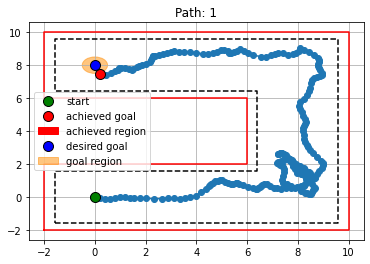

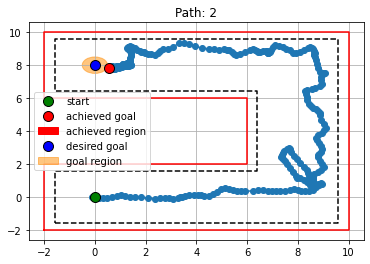

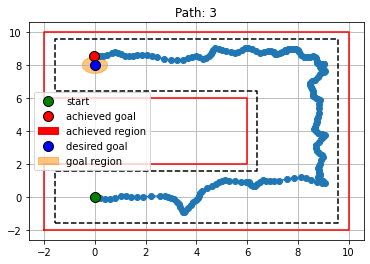

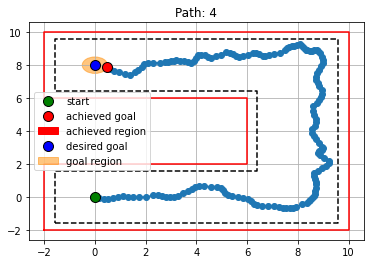

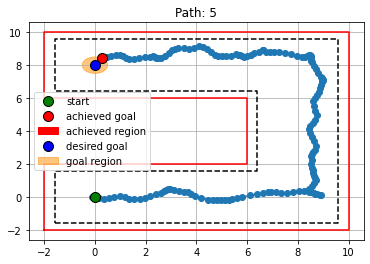

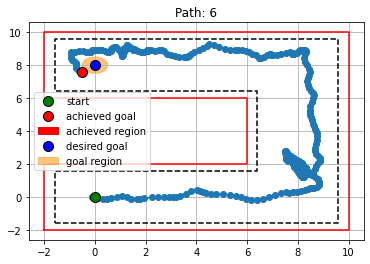

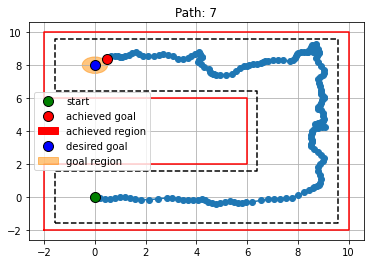

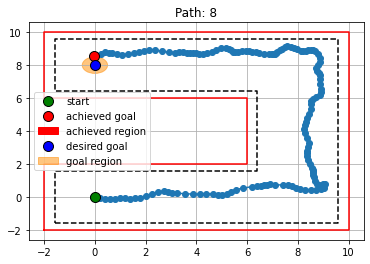

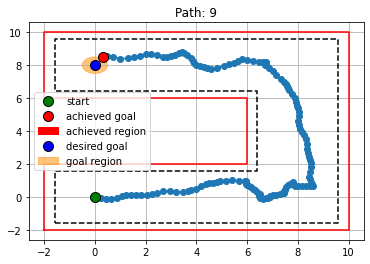

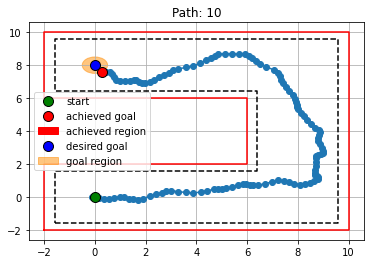

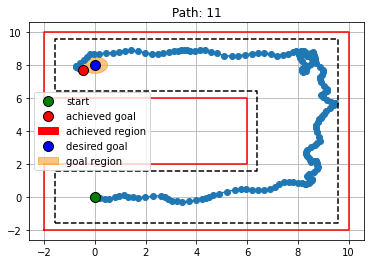

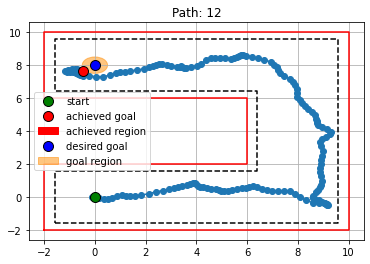

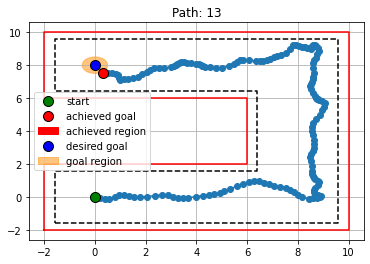

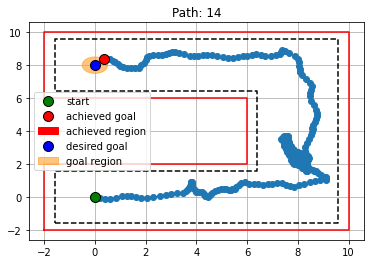

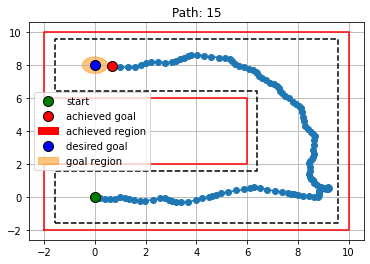

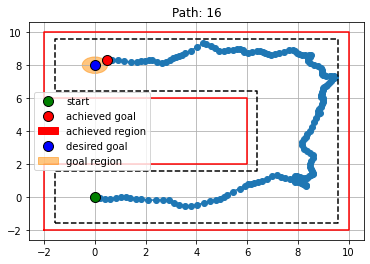

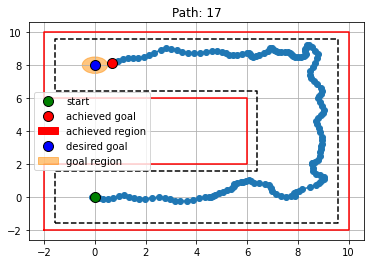

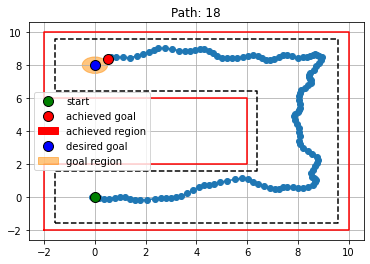

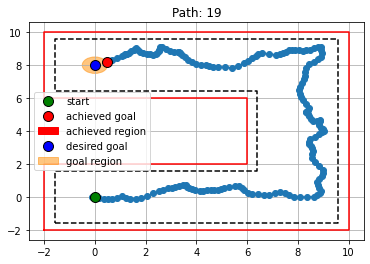

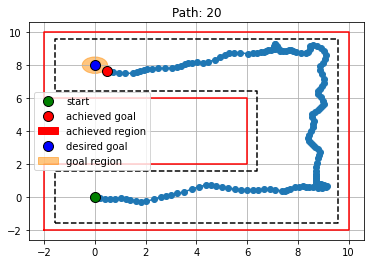

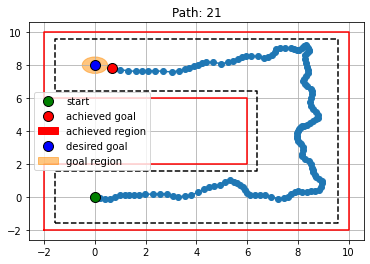

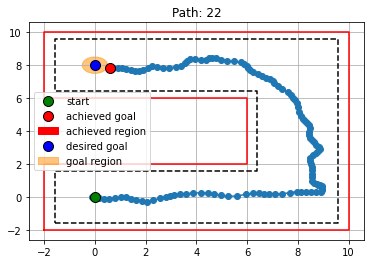

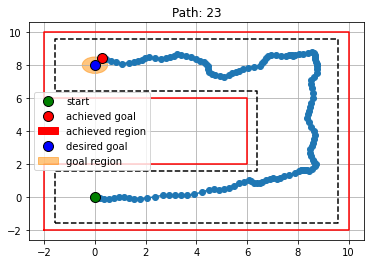

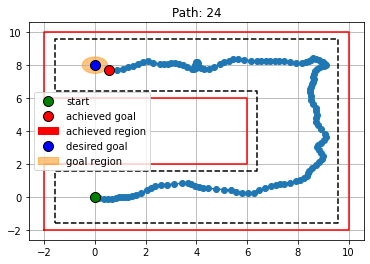

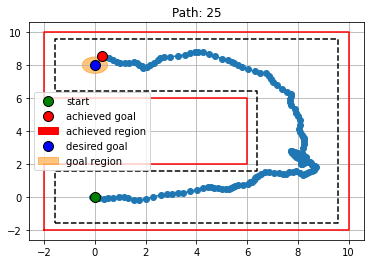

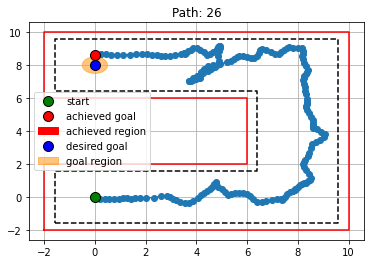

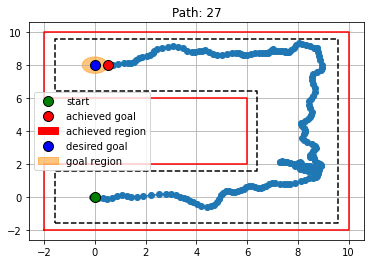

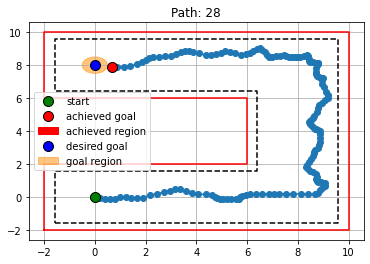

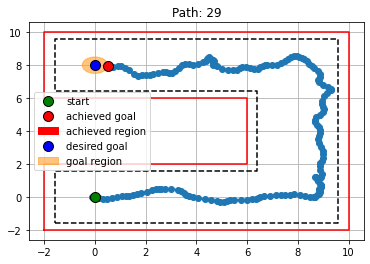

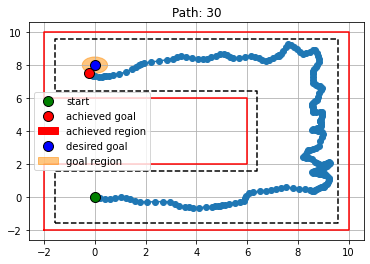

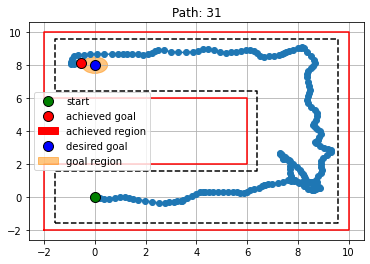

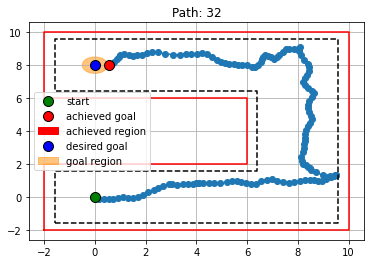

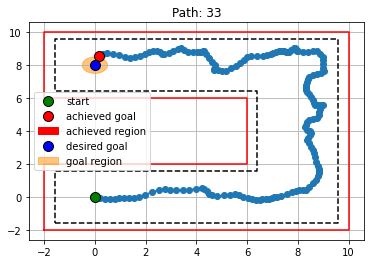

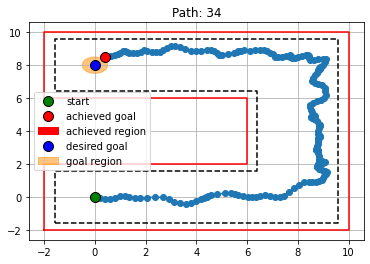

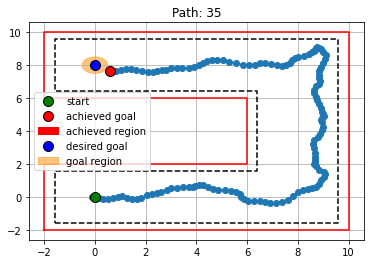

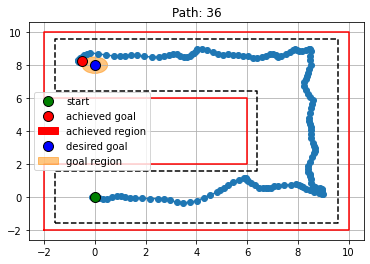

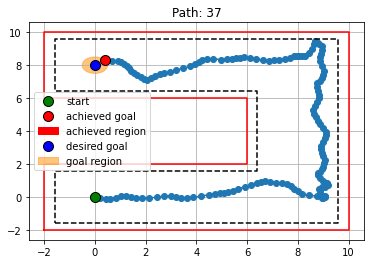

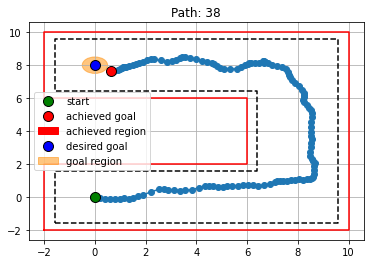

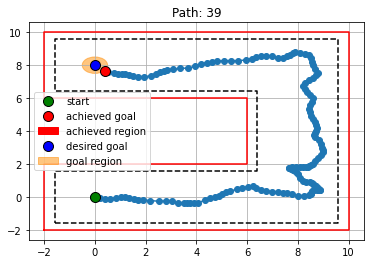

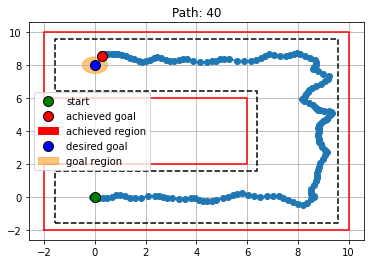

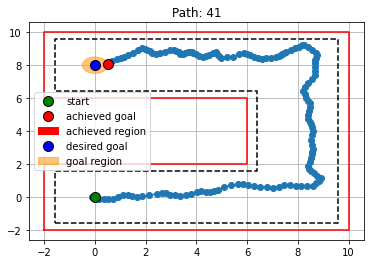

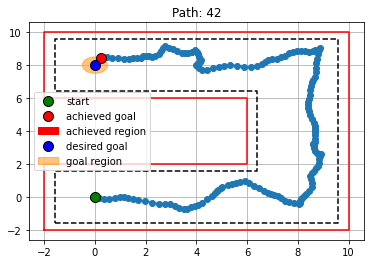

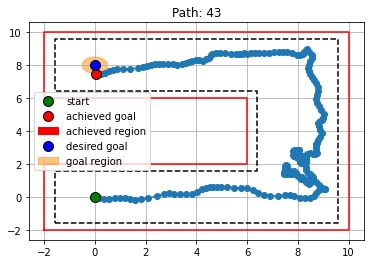

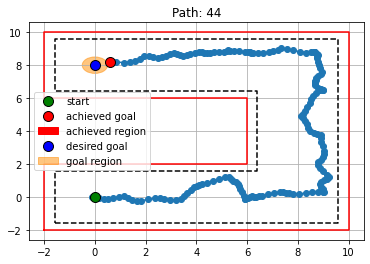

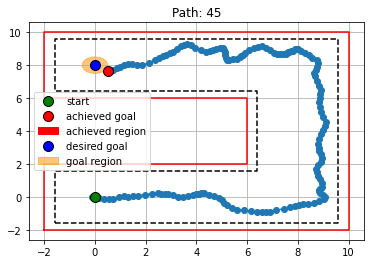

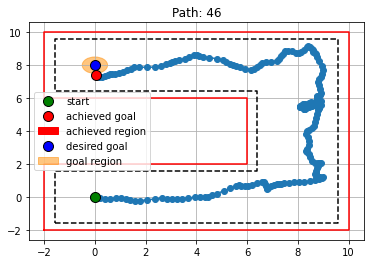

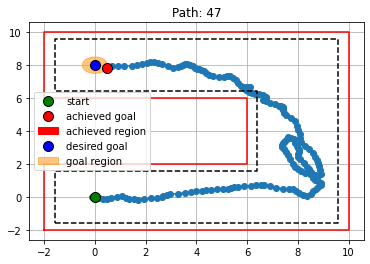

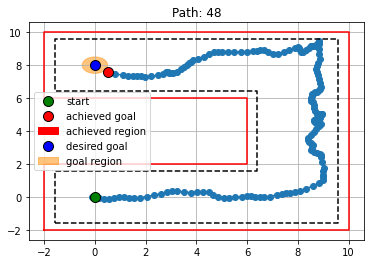

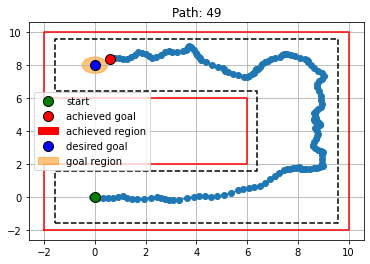

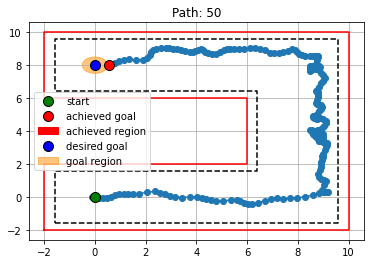

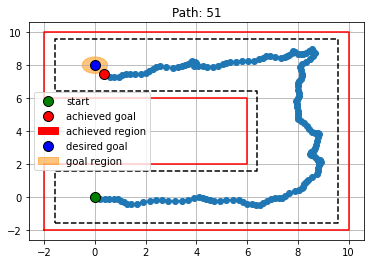

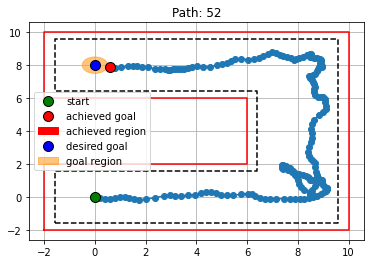

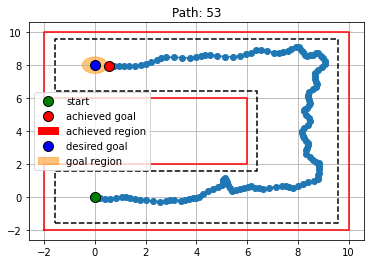

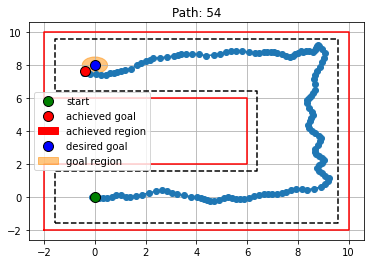

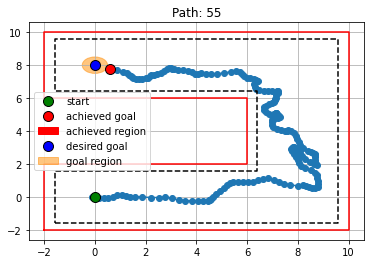

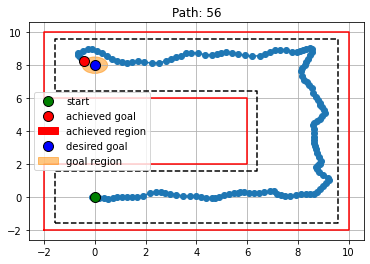

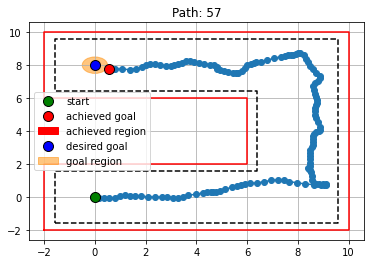

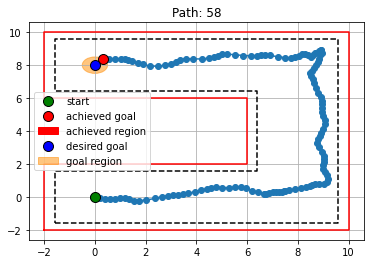

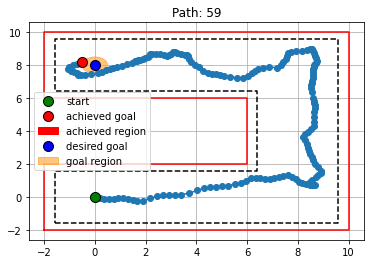

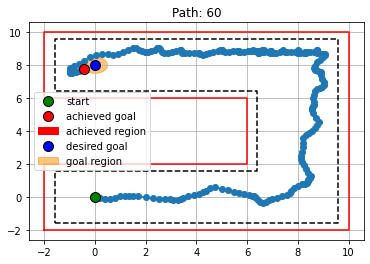

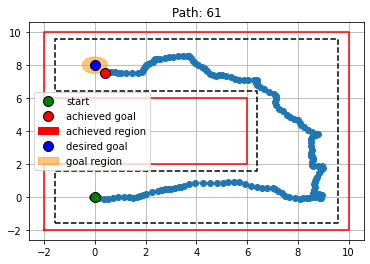

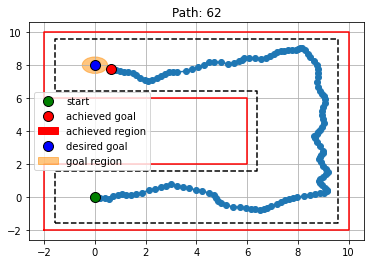

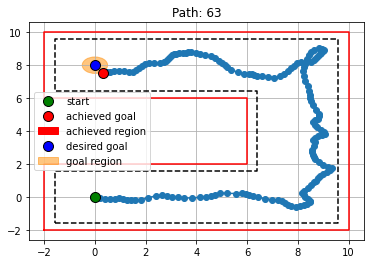

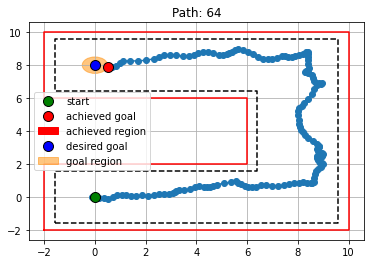

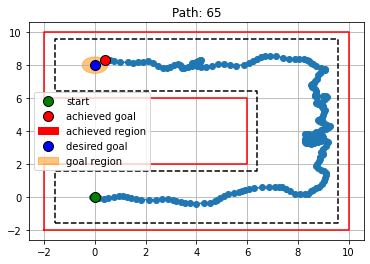

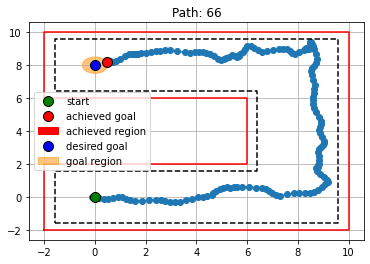

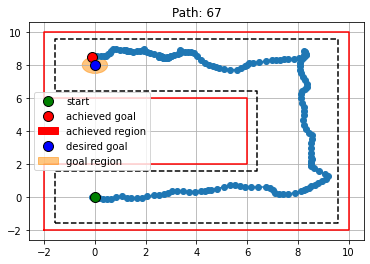

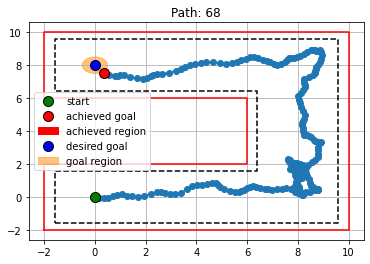

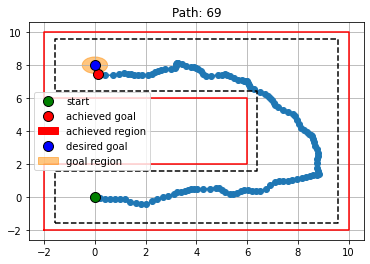

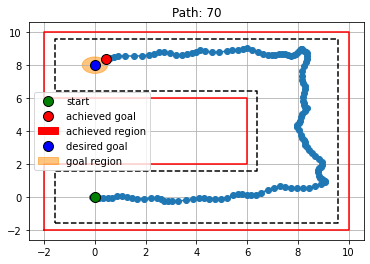

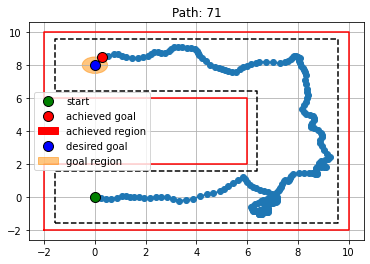

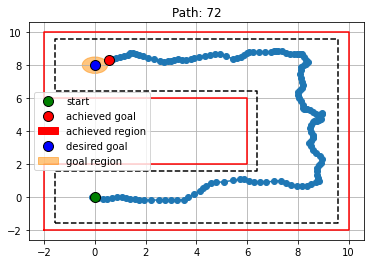

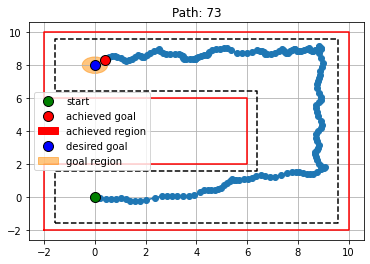

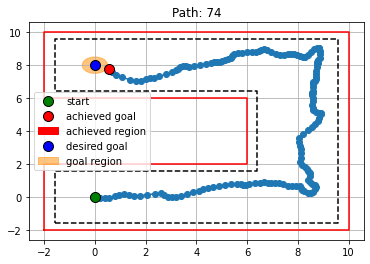

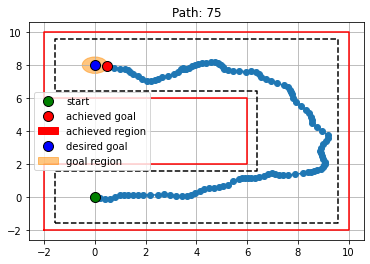

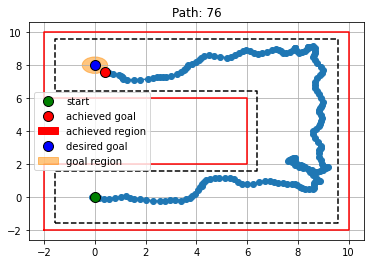

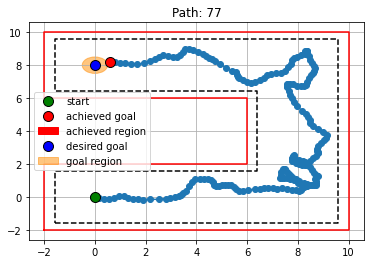

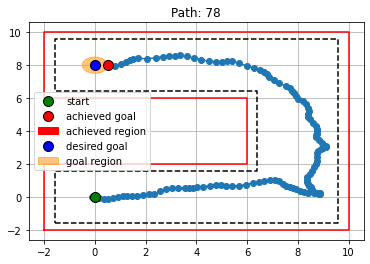

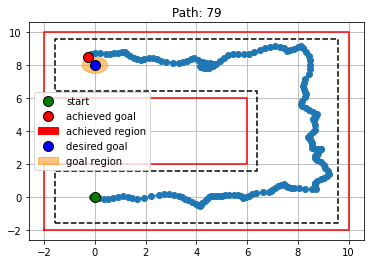

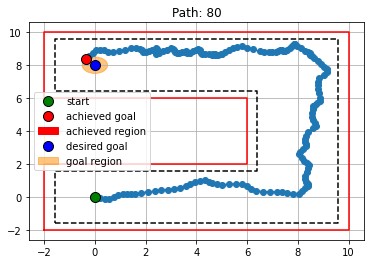

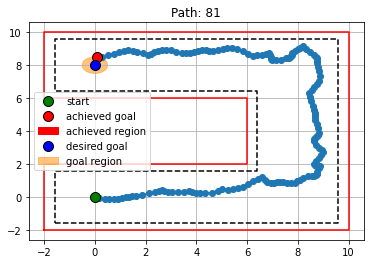

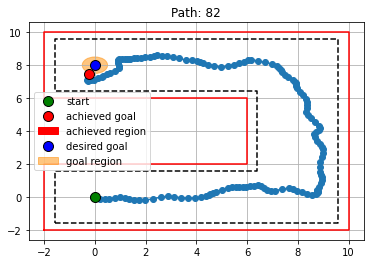

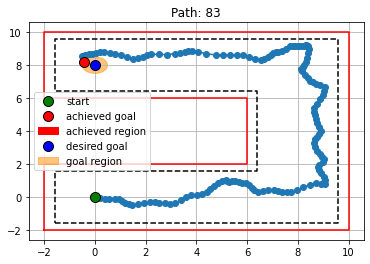

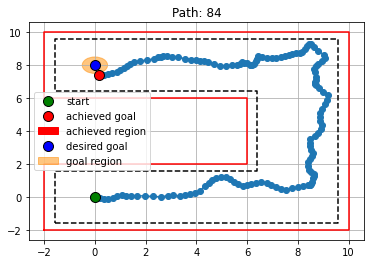

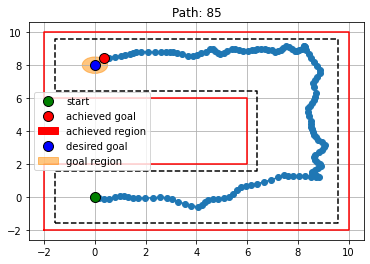

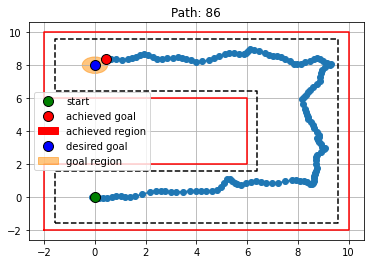

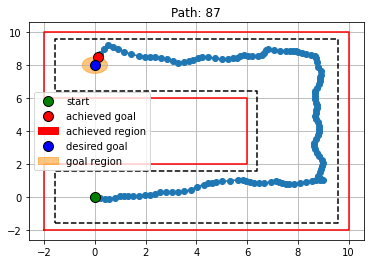

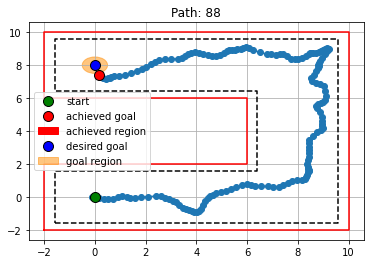

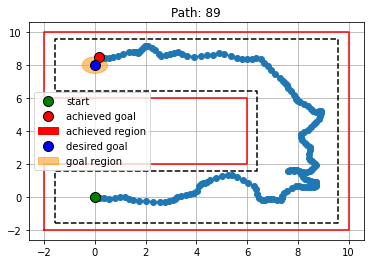

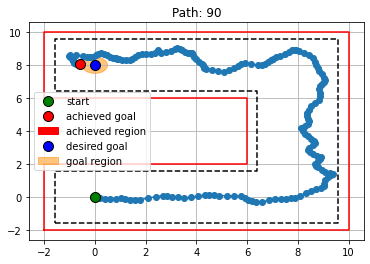

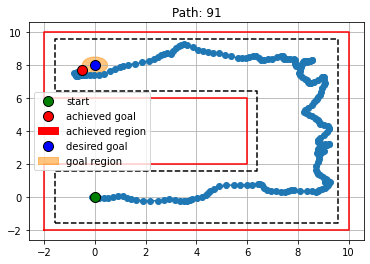

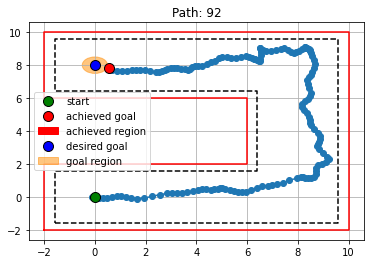

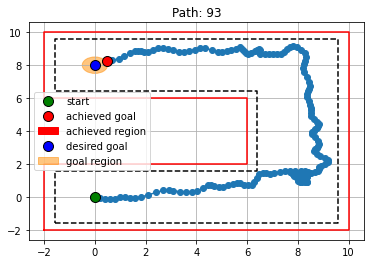

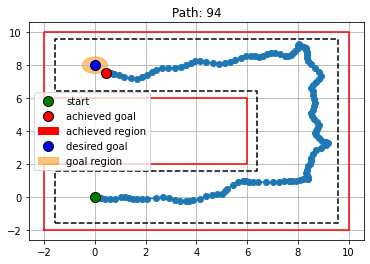

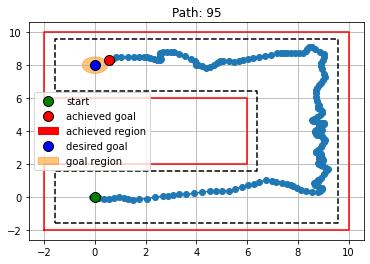

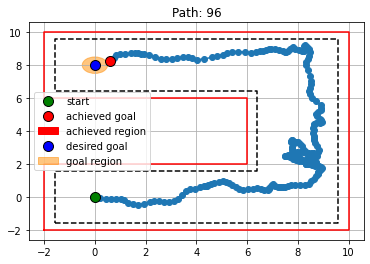

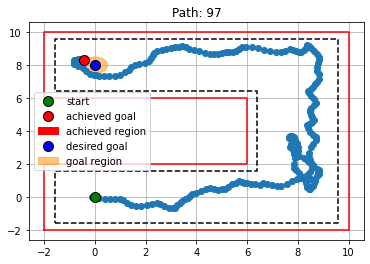

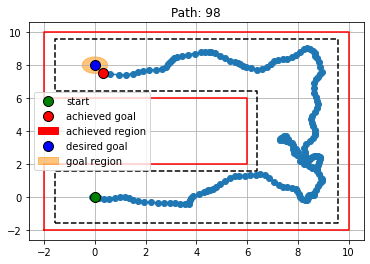

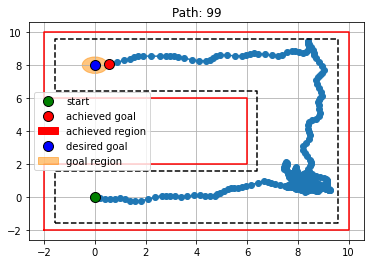

In [9]:
i = 0
for num, j in enumerate(lst):
    visualize_path(data['obs'][i:j, :2], goal=[0, 8])
    plt.title("Path: {}".format(num))
    plt.show()
    i = j+1
    